In [ ]:
from google.colab import drive


In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import math
import sklearn
import sklearn.preprocessing
import datetime
import os
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
path_df = "/content/drive/MyDrive/Проект/prices-split-adjusted.csv"

df = pd.read_csv(path_df, index_col = 0)
df.info()
df.head()

# number of different stocks
print('\nnumber of different stocks: ', len(list(set(df.symbol))))
print(list(set(df.symbol))[:10])

<class 'pandas.core.frame.DataFrame'>
Index: 851264 entries, 2016-01-05 to 2016-12-30
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   symbol  851264 non-null  object 
 1   open    851264 non-null  float64
 2   close   851264 non-null  float64
 3   low     851264 non-null  float64
 4   high    851264 non-null  float64
 5   volume  851264 non-null  float64
dtypes: float64(5), object(1)
memory usage: 45.5+ MB

number of different stocks:  501
['K', 'RL', 'HOG', 'MDLZ', 'ABBV', 'DISCA', 'PSX', 'WRK', 'EMN', 'CHD']


In [ ]:
valid_set_size_percentage = 10
test_set_size_percentage = 10

In [ ]:
path_df = "/content/drive/MyDrive/Проект/prices-split-adjusted.csv"

df = pd.read_csv(path_df, index_col = 0)
df.info()
df.head()

# number of different stocks
print('\nnumber of different stocks: ', len(list(set(df.symbol))))
print(list(set(df.symbol))[:10])

<class 'pandas.core.frame.DataFrame'>
Index: 851264 entries, 2016-01-05 to 2016-12-30
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   symbol  851264 non-null  object 
 1   open    851264 non-null  float64
 2   close   851264 non-null  float64
 3   low     851264 non-null  float64
 4   high    851264 non-null  float64
 5   volume  851264 non-null  float64
dtypes: float64(5), object(1)
memory usage: 45.5+ MB

number of different stocks:  501
['ADM', 'BMY', 'CELG', 'CF', 'UDR', 'MA', 'LH', 'NOC', 'DOV', 'TSCO']


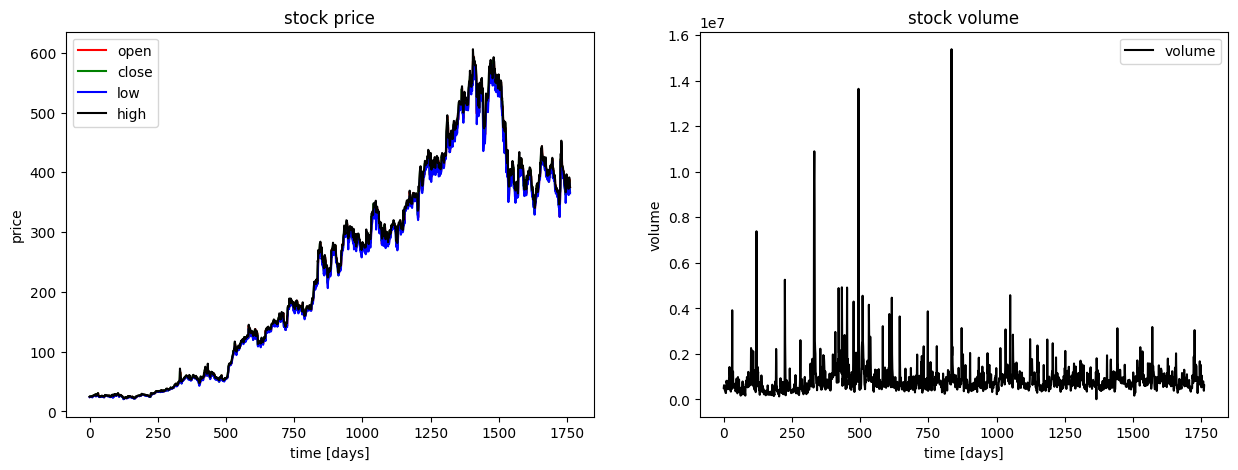

In [ ]:
plt.figure(figsize=(15, 5));
plt.subplot(1,2,1);
plt.plot(df[df.symbol == 'REGN'].open.values, color='red', label='open')
plt.plot(df[df.symbol == 'REGN'].close.values, color='green', label='close')
plt.plot(df[df.symbol == 'REGN'].low.values, color='blue', label='low')
plt.plot(df[df.symbol == 'REGN'].high.values, color='black', label='high')
plt.title('stock price')
plt.xlabel('time [days]')
plt.ylabel('price')
plt.legend(loc='best')
#plt.show()

plt.subplot(1,2,2);
plt.plot(df[df.symbol == 'REGN'].volume.values, color='black', label='volume')
plt.title('stock volume')
plt.xlabel('time [days]')
plt.ylabel('volume')
plt.legend(loc='best');

In [ ]:
import numpy as np
import pandas as pd
import sklearn.preprocessing

# function for min-max normalization of stock
def normalize_data(df):
    min_max_scaler = sklearn.preprocessing.MinMaxScaler()
    df['open'] = min_max_scaler.fit_transform(df.open.values.reshape(-1,1))
    df['high'] = min_max_scaler.fit_transform(df.high.values.reshape(-1,1))
    df['low'] = min_max_scaler.fit_transform(df.low.values.reshape(-1,1))
    df['close'] = min_max_scaler.fit_transform(df['close'].values.reshape(-1,1))
    return df

# function to create train, validation, test data given stock data and sequence length
def load_data(stock, seq_len):
    data_raw = stock.values
    data = []

    # create all possible sequences of length seq_len
    for index in range(len(data_raw) - seq_len):
        data.append(data_raw[index: index + seq_len])

    data = np.array(data)
    valid_set_size = int(np.round(valid_set_size_percentage/100*data.shape[0]))
    test_set_size = int(np.round(test_set_size_percentage/100*data.shape[0]))
    train_set_size = data.shape[0] - (valid_set_size + test_set_size)

    x_train = data[:train_set_size, :-1, :]
    y_train = data[:train_set_size, -1, :]

    x_valid = data[train_set_size:train_set_size+valid_set_size, :-1, :]
    y_valid = data[train_set_size:train_set_size+valid_set_size, -1, :]

    x_test = data[train_set_size+valid_set_size:, :-1, :]
    y_test = data[train_set_size+valid_set_size:, -1, :]

    return x_train, y_train, x_valid, y_valid, x_test, y_test

# Other parts of your code...

# Choose one stock
df_stock = df[df.symbol == 'REGN'].copy()
df_stock.drop(columns=['symbol'], inplace=True)  # Use the 'columns' parameter and 'inplace'
df_stock.drop(['volume'],1,inplace=True)
cols = list(df_stock.columns.values)
print('df_stock.columns.values = ', cols)

# normalize stock
df_stock_norm = df_stock.copy()
df_stock_norm = normalize_data(df_stock_norm)

# create train, test data
seq_len = 20 # choose sequence length
x_train, y_train, x_valid, y_valid, x_test, y_test = load_data(df_stock_norm, seq_len)
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ', y_train.shape)
print('x_valid.shape = ',x_valid.shape)
print('y_valid.shape = ', y_valid.shape)
print('x_test.shape = ', x_test.shape)
print('y_test.shape = ',y_test.shape)

df_stock.columns.values =  ['open', 'close', 'low', 'high']
x_train.shape =  (1394, 19, 4)
y_train.shape =  (1394, 4)
x_valid.shape =  (174, 19, 4)
y_valid.shape =  (174, 4)
x_test.shape =  (174, 19, 4)
y_test.shape =  (174, 4)


<ipython-input-23-1681d6127ae3>:44: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_stock.drop(['volume'],1,inplace=True)


In [ ]:
x_train

array([[[0.00555362, 0.00671786, 0.00627529, 0.00522144],
        [0.00606008, 0.0075401 , 0.00723798, 0.00583774],
        [0.00693329, 0.00687531, 0.00727363, 0.00582063],
        ...,
        [0.00880196, 0.01091653, 0.01007256, 0.00897061],
        [0.01046106, 0.00979689, 0.01005473, 0.00905621],
        [0.00958785, 0.01026924, 0.01082131, 0.0091418 ]],

       [[0.00606008, 0.0075401 , 0.00723798, 0.00583774],
        [0.00693329, 0.00687531, 0.00727363, 0.00582063],
        [0.00670625, 0.0066129 , 0.00677446, 0.00547823],
        ...,
        [0.01046106, 0.00979689, 0.01005473, 0.00905621],
        [0.00958785, 0.01026924, 0.01082131, 0.0091418 ],
        [0.00984981, 0.01000682, 0.00971601, 0.00883365]],

       [[0.00693329, 0.00687531, 0.00727363, 0.00582063],
        [0.00670625, 0.0066129 , 0.00677446, 0.00547823],
        [0.00588544, 0.00626301, 0.00659619, 0.00513584],
        ...,
        [0.00958785, 0.01026924, 0.01082131, 0.0091418 ],
        [0.00984981, 0.010006

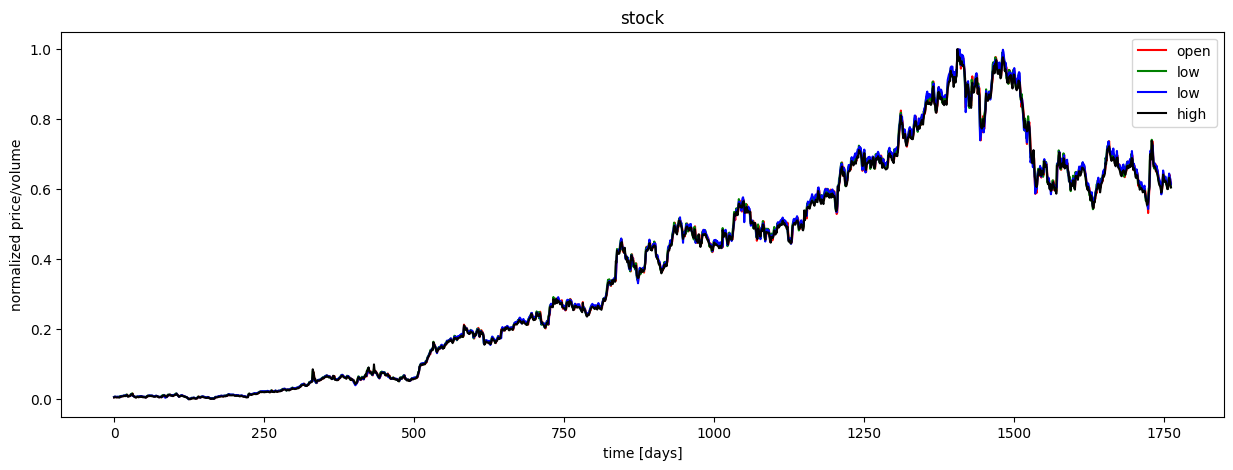

In [ ]:
plt.figure(figsize=(15, 5));
plt.plot(df_stock_norm.open.values, color='red', label='open')
plt.plot(df_stock_norm.close.values, color='green', label='low')
plt.plot(df_stock_norm.low.values, color='blue', label='low')
plt.plot(df_stock_norm.high.values, color='black', label='high')
#plt.plot(df_stock_norm.volume.values, color='gray', label='volume')
plt.title('stock')
plt.xlabel('time [days]')
plt.ylabel('normalized price/volume')
plt.legend(loc='best')
plt.show()

In [ ]:
import tensorflow as tf
import numpy as np

# Set random seed for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

index_in_epoch = 0
perm_array = np.arange(x_train.shape[0])
np.random.shuffle(perm_array)

def get_next_batch(batch_size):
    global index_in_epoch, x_train, perm_array
    start = index_in_epoch
    index_in_epoch += batch_size

    if index_in_epoch > x_train.shape[0]:
        np.random.shuffle(perm_array)
        start = 0
        index_in_epoch = batch_size

    end = index_in_epoch
    return x_train[perm_array[start:end]], y_train[perm_array[start:end]]

n_steps = seq_len - 1
n_inputs = 4  # Change this to match the number of features in your data
n_neurons = 200
n_outputs = 4
n_layers = 2
learning_rate = 0.001
batch_size = 50
n_epochs = 100
train_set_size = x_train.shape[0]
test_set_size = x_test.shape[0]

X = tf.keras.Input(shape=(n_steps, n_inputs))
y = tf.keras.Input(shape=(n_outputs,))

# Use Basic RNN Cell
layers = [tf.keras.layers.SimpleRNNCell(units=n_neurons, activation='elu')
          for layer in range(n_layers)]

multi_layer_cell = tf.keras.layers.StackedRNNCells(layers)
rnn_layer = tf.keras.layers.RNN(multi_layer_cell, return_sequences=True)
rnn_outputs = rnn_layer(X)

stacked_rnn_outputs = tf.reshape(rnn_outputs, [-1, n_neurons])
stacked_outputs = tf.keras.layers.Dense(n_outputs)(stacked_rnn_outputs)
outputs = tf.reshape(stacked_outputs, [-1, n_steps, n_outputs])
outputs = outputs[:, n_steps - 1, :]

model_regn_rnn = tf.keras.Model(inputs=X, outputs=outputs)

loss = tf.reduce_mean(tf.square(outputs - y))

optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

# Compile the model with optimizer and loss function
model_regn_rnn.compile(optimizer=optimizer, loss='mean_squared_error')

# Train the model using custom training loop
for epoch in range(n_epochs):
    for iteration in range(train_set_size // batch_size):
        x_batch, y_batch = get_next_batch(batch_size)

        with tf.GradientTape() as tape:
            y_pred = model_regn_rnn(x_batch)
            current_loss = tf.reduce_mean(tf.square(y_pred - y_batch))

        gradients = tape.gradient(current_loss, model_regn_rnn.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model_regn_rnn.trainable_variables))

    if epoch % 5 == 0:
        mse_train = model_regn_rnn.evaluate(x_train, y_train, verbose=0)
        mse_valid = model_regn_rnn.evaluate(x_valid, y_valid, verbose=0)
        print('%.2f epochs: MSE train/valid = %.6f/%.6f' % (
            epoch, mse_train, mse_valid))

# Make predictions
y_train_pred_regn_rnn = model_regn_rnn.predict(x_train)
y_valid_pred_regn_rnn = model_regn_rnn.predict(x_valid)
y_test_pred_regn_rnn = model_regn_rnn.predict(x_test)

0.00 epochs: MSE train/valid = 0.005600/0.011786
5.00 epochs: MSE train/valid = 0.000238/0.001091
10.00 epochs: MSE train/valid = 0.000176/0.000992
15.00 epochs: MSE train/valid = 0.000170/0.001004
20.00 epochs: MSE train/valid = 0.000238/0.001088
25.00 epochs: MSE train/valid = 0.000228/0.001048
30.00 epochs: MSE train/valid = 0.000130/0.000740
35.00 epochs: MSE train/valid = 0.000162/0.000683
40.00 epochs: MSE train/valid = 0.000115/0.000797
45.00 epochs: MSE train/valid = 0.000135/0.000587
50.00 epochs: MSE train/valid = 0.000278/0.000814
55.00 epochs: MSE train/valid = 0.000088/0.000553
60.00 epochs: MSE train/valid = 0.000349/0.001335
65.00 epochs: MSE train/valid = 0.000295/0.001389
70.00 epochs: MSE train/valid = 0.000082/0.000542
75.00 epochs: MSE train/valid = 0.000108/0.000599
80.00 epochs: MSE train/valid = 0.000091/0.000449
85.00 epochs: MSE train/valid = 0.000101/0.000575
90.00 epochs: MSE train/valid = 0.000133/0.000844
95.00 epochs: MSE train/valid = 0.000068/0.000403
6/

correct sign prediction for close - open price for train/valid/test: 0.54/0.48/0.49


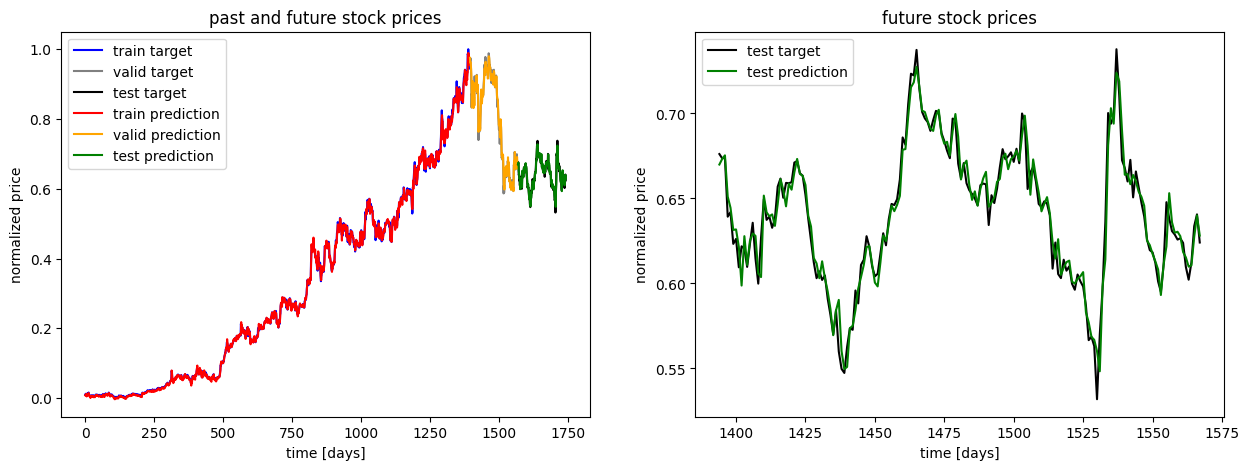

In [ ]:
ft = 0 # 0 = open, 1 = close, 2 = highest, 3 = lowest

## show predictions
plt.figure(figsize=(15, 5));
plt.subplot(1,2,1);

plt.plot(np.arange(y_train.shape[0]), y_train[:,ft], color='blue', label='train target')

plt.plot(np.arange(y_train.shape[0], y_train.shape[0]+y_valid.shape[0]), y_valid[:,ft],
         color='gray', label='valid target')

plt.plot(np.arange(y_train.shape[0]+y_valid.shape[0],
                   y_train.shape[0]+y_test.shape[0]+y_test.shape[0]),
         y_test[:,ft], color='black', label='test target')

plt.plot(np.arange(y_train_pred_regn_rnn.shape[0]),y_train_pred_regn_rnn[:,ft], color='red',
         label='train prediction')

plt.plot(np.arange(y_train_pred_regn_rnn.shape[0], y_train_pred_regn_rnn.shape[0]+y_valid_pred_regn_rnn.shape[0]),
         y_valid_pred_regn_rnn[:,ft], color='orange', label='valid prediction')

plt.plot(np.arange(y_train_pred_regn_rnn.shape[0]+y_valid_pred_regn_rnn.shape[0],
                   y_train_pred_regn_rnn.shape[0]+y_valid_pred_regn_rnn.shape[0]+y_test_pred_regn_rnn.shape[0]),
         y_test_pred_regn_rnn[:,ft], color='green', label='test prediction')

plt.title('past and future stock prices')
plt.xlabel('time [days]')
plt.ylabel('normalized price')
plt.legend(loc='best');

plt.subplot(1,2,2);

plt.plot(np.arange(y_train.shape[0], y_train.shape[0]+y_test.shape[0]),
         y_test[:,ft], color='black', label='test target')

plt.plot(np.arange(y_train_pred_regn_rnn.shape[0], y_train_pred_regn_rnn.shape[0]+y_test_pred_regn_rnn.shape[0]),
         y_test_pred_regn_rnn[:,ft], color='green', label='test prediction')

plt.title('future stock prices')
plt.xlabel('time [days]')
plt.ylabel('normalized price')
plt.legend(loc='best');

corr_price_development_train = np.sum(np.equal(np.sign(y_train[:,1]-y_train[:,0]),
            np.sign(y_train_pred_regn_rnn[:,1]-y_train_pred_regn_rnn[:,0])).astype(int)) / y_train.shape[0]
corr_price_development_valid = np.sum(np.equal(np.sign(y_valid[:,1]-y_valid[:,0]),
            np.sign(y_valid_pred_regn_rnn[:,1]-y_valid_pred_regn_rnn[:,0])).astype(int)) / y_valid.shape[0]
corr_price_development_test = np.sum(np.equal(np.sign(y_test[:,1]-y_test[:,0]),
            np.sign(y_test_pred_regn_rnn[:,1]-y_test_pred_regn_rnn[:,0])).astype(int)) / y_test.shape[0]

print('correct sign prediction for close - open price for train/valid/test: %.2f/%.2f/%.2f'%(
    corr_price_development_train, corr_price_development_valid, corr_price_development_test))

In [ ]:
import torch


def save_and_download(filename, file):
    np.save(filename + '.npy', file)
    files.download(filename + '.npy')


def download_save_model(model, modelname):
  model.save(modelname + '.h5')
  files.download(modelname + '.h5')



LSTM


In [ ]:
import tensorflow as tf
import numpy as np

# Set random seed for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

index_in_epoch = 0
perm_array = np.arange(x_train.shape[0])
np.random.shuffle(perm_array)

def get_next_batch(batch_size):
    global index_in_epoch, x_train, perm_array
    start = index_in_epoch
    index_in_epoch += batch_size

    if index_in_epoch > x_train.shape[0]:
        np.random.shuffle(perm_array)
        start = 0
        index_in_epoch = batch_size

    end = index_in_epoch
    return x_train[perm_array[start:end]], y_train[perm_array[start:end]]

n_steps = seq_len - 1
n_inputs = 4  # Change this to match the number of features in your data
n_neurons = 200
n_outputs = 4
n_layers = 2
learning_rate = 0.001
batch_size = 50
n_epochs = 100
train_set_size = x_train.shape[0]
test_set_size = x_test.shape[0]

X = tf.keras.Input(shape=(n_steps, n_inputs))
y = tf.keras.Input(shape=(n_outputs,))

# Use LSTM Cells
layers = [tf.keras.layers.LSTMCell(units=n_neurons, activation='elu')
          for layer in range(n_layers)]

multi_layer_cell = tf.keras.layers.StackedRNNCells(layers)
rnn_layer = tf.keras.layers.RNN(multi_layer_cell, return_sequences=True)
rnn_outputs = rnn_layer(X)

stacked_rnn_outputs = tf.reshape(rnn_outputs, [-1, n_neurons])
stacked_outputs = tf.keras.layers.Dense(n_outputs)(stacked_rnn_outputs)
outputs = tf.reshape(stacked_outputs, [-1, n_steps, n_outputs])
outputs = outputs[:, n_steps - 1, :]

model_regn_lstm = tf.keras.Model(inputs=X, outputs=outputs)

loss = tf.reduce_mean(tf.square(outputs - y))

optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

# Compile the model with optimizer and loss function
model_regn_lstm.compile(optimizer=optimizer, loss='mean_squared_error')

# Train the model using custom training loop
for epoch in range(n_epochs):
    for iteration in range(train_set_size // batch_size):
        x_batch, y_batch = get_next_batch(batch_size)

        with tf.GradientTape() as tape:
            y_pred = model_regn_lstm(x_batch)
            current_loss = tf.reduce_mean(tf.square(y_pred - y_batch))

        gradients = tape.gradient(current_loss, model_regn_lstm.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model_regn_lstm.trainable_variables))

    if epoch % 5 == 0:
        mse_train = model_regn_lstm.evaluate(x_train, y_train, verbose=0)
        mse_valid = model_regn_lstm.evaluate(x_valid, y_valid, verbose=0)
        print('%.2f epochs: MSE train/valid = %.6f/%.6f' % (
            epoch, mse_train, mse_valid))

# Make predictions
y_train_pred_regn_lstm = model_regn_lstm.predict(x_train)
y_valid_pred_regn_lstm = model_regn_lstm.predict(x_valid)
y_test_pred_regn_lstm = model_regn_lstm.predict(x_test)


0.00 epochs: MSE train/valid = 0.001329/0.006352
5.00 epochs: MSE train/valid = 0.000316/0.002922
10.00 epochs: MSE train/valid = 0.000281/0.002413
15.00 epochs: MSE train/valid = 0.000689/0.002035
20.00 epochs: MSE train/valid = 0.000288/0.002171
25.00 epochs: MSE train/valid = 0.000231/0.001451
30.00 epochs: MSE train/valid = 0.000305/0.002542
35.00 epochs: MSE train/valid = 0.000184/0.001188
40.00 epochs: MSE train/valid = 0.000177/0.001332
45.00 epochs: MSE train/valid = 0.000150/0.000917
50.00 epochs: MSE train/valid = 0.000193/0.000785
55.00 epochs: MSE train/valid = 0.000162/0.000710
60.00 epochs: MSE train/valid = 0.000126/0.000682
65.00 epochs: MSE train/valid = 0.000197/0.001487
70.00 epochs: MSE train/valid = 0.000093/0.000553
75.00 epochs: MSE train/valid = 0.000108/0.000769
80.00 epochs: MSE train/valid = 0.000080/0.000445
85.00 epochs: MSE train/valid = 0.000073/0.000424
90.00 epochs: MSE train/valid = 0.000070/0.000378
95.00 epochs: MSE train/valid = 0.000067/0.000360
6/

correct sign prediction for close - open price for train/valid/test: 0.59/0.52/0.49


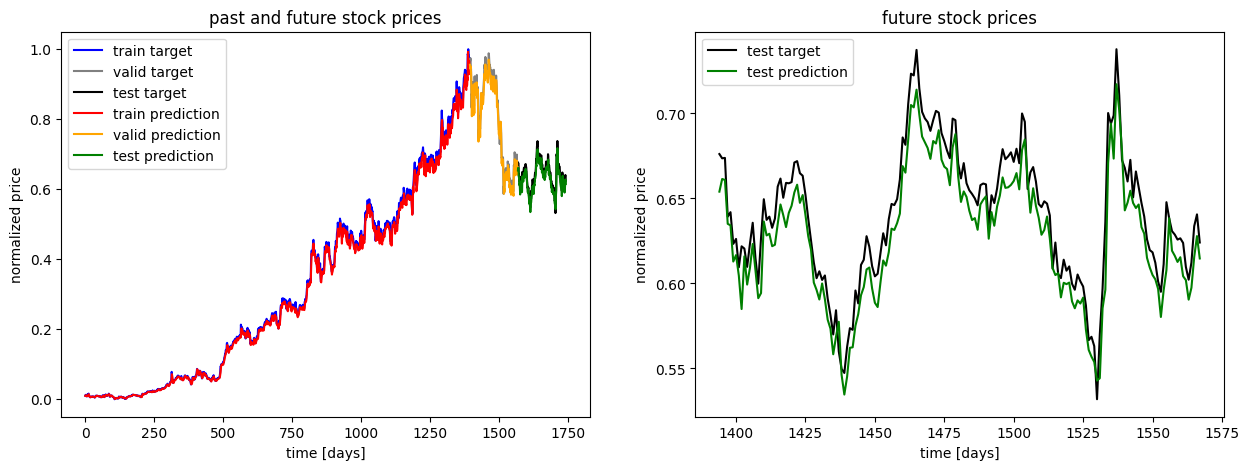

In [ ]:
ft = 0 # 0 = open, 1 = close, 2 = highest, 3 = lowest

## show predictions
plt.figure(figsize=(15, 5));
plt.subplot(1,2,1);

plt.plot(np.arange(y_train.shape[0]), y_train[:,ft], color='blue', label='train target')

plt.plot(np.arange(y_train.shape[0], y_train.shape[0]+y_valid.shape[0]), y_valid[:,ft],
         color='gray', label='valid target')

plt.plot(np.arange(y_train.shape[0]+y_valid.shape[0],
                   y_train.shape[0]+y_test.shape[0]+y_test.shape[0]),
         y_test[:,ft], color='black', label='test target')

plt.plot(np.arange(y_train_pred_regn_lstm.shape[0]),y_train_pred_regn_lstm[:,ft], color='red',
         label='train prediction')

plt.plot(np.arange(y_train_pred_regn_lstm.shape[0], y_train_pred_regn_lstm.shape[0]+y_valid_pred_regn_lstm.shape[0]),
         y_valid_pred_regn_lstm[:,ft], color='orange', label='valid prediction')

plt.plot(np.arange(y_train_pred_regn_lstm.shape[0]+y_valid_pred_regn_lstm.shape[0],
                   y_train_pred_regn_lstm.shape[0]+y_valid_pred_regn_lstm.shape[0]+y_test_pred_regn_lstm.shape[0]),
         y_test_pred_regn_lstm[:,ft], color='green', label='test prediction')

plt.title('past and future stock prices')
plt.xlabel('time [days]')
plt.ylabel('normalized price')
plt.legend(loc='best');

plt.subplot(1,2,2);

plt.plot(np.arange(y_train.shape[0], y_train.shape[0]+y_test.shape[0]),
         y_test[:,ft], color='black', label='test target')

plt.plot(np.arange(y_train_pred_regn_lstm.shape[0], y_train_pred_regn_lstm.shape[0]+y_test_pred_regn_lstm.shape[0]),
         y_test_pred_regn_lstm[:,ft], color='green', label='test prediction')

plt.title('future stock prices')
plt.xlabel('time [days]')
plt.ylabel('normalized price')
plt.legend(loc='best');

corr_price_development_train = np.sum(np.equal(np.sign(y_train[:,1]-y_train[:,0]),
            np.sign(y_train_pred_regn_lstm[:,1]-y_train_pred_regn_lstm[:,0])).astype(int)) / y_train.shape[0]
corr_price_development_valid = np.sum(np.equal(np.sign(y_valid[:,1]-y_valid[:,0]),
            np.sign(y_valid_pred_regn_lstm[:,1]-y_valid_pred_regn_lstm[:,0])).astype(int)) / y_valid.shape[0]
corr_price_development_test = np.sum(np.equal(np.sign(y_test[:,1]-y_test[:,0]),
            np.sign(y_test_pred_regn_lstm[:,1]-y_test_pred_regn_lstm[:,0])).astype(int)) / y_test.shape[0]

print('correct sign prediction for close - open price for train/valid/test: %.2f/%.2f/%.2f'%(
    corr_price_development_train, corr_price_development_valid, corr_price_development_test))

GRU cell

In [ ]:
import tensorflow as tf
import numpy as np

# Set random seed for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

index_in_epoch = 0
perm_array = np.arange(x_train.shape[0])
np.random.shuffle(perm_array)

def get_next_batch(batch_size):
    global index_in_epoch, x_train, perm_array
    start = index_in_epoch
    index_in_epoch += batch_size

    if index_in_epoch > x_train.shape[0]:
        np.random.shuffle(perm_array)
        start = 0
        index_in_epoch = batch_size

    end = index_in_epoch
    return x_train[perm_array[start:end]], y_train[perm_array[start:end]]

n_steps = seq_len - 1
n_inputs = 4  # Change this to match the number of features in your data
n_neurons = 200
n_outputs = 4
n_layers = 2
learning_rate = 0.001
batch_size = 50
n_epochs = 100
train_set_size = x_train.shape[0]
test_set_size = x_test.shape[0]

X = tf.keras.Input(shape=(n_steps, n_inputs))
y = tf.keras.Input(shape=(n_outputs,))

# Use GRU Cells
layers = [tf.keras.layers.GRUCell(units=n_neurons, activation='elu')
          for layer in range(n_layers)]

multi_layer_cell = tf.keras.layers.StackedRNNCells(layers)
rnn_layer = tf.keras.layers.RNN(multi_layer_cell, return_sequences=True)
rnn_outputs = rnn_layer(X)

stacked_rnn_outputs = tf.reshape(rnn_outputs, [-1, n_neurons])
stacked_outputs = tf.keras.layers.Dense(n_outputs)(stacked_rnn_outputs)
outputs = tf.reshape(stacked_outputs, [-1, n_steps, n_outputs])
outputs = outputs[:, n_steps - 1, :]

model_regn_gru = tf.keras.Model(inputs=X, outputs=outputs)

loss = tf.reduce_mean(tf.square(outputs - y))

optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

# Compile the model with optimizer and loss function
model_regn_gru.compile(optimizer=optimizer, loss='mean_squared_error')

# Train the model using custom training loop
for epoch in range(n_epochs):
    for iteration in range(train_set_size // batch_size):
        x_batch, y_batch = get_next_batch(batch_size)

        with tf.GradientTape() as tape:
            y_pred = model_regn_gru(x_batch)
            current_loss = tf.reduce_mean(tf.square(y_pred - y_batch))

        gradients = tape.gradient(current_loss, model_regn_gru.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model_regn_gru.trainable_variables))

    if epoch % 5 == 0:
        mse_train = model_regn_gru.evaluate(x_train, y_train, verbose=0)
        mse_valid = model_regn_gru.evaluate(x_valid, y_valid, verbose=0)
        print('%.2f epochs: MSE train/valid = %.6f/%.6f' % (
            epoch, mse_train, mse_valid))

# Make predictions
y_train_pred_regn_gru = model_regn_gru.predict(x_train)
y_valid_pred_regn_gru = model_regn_gru.predict(x_valid)
y_test_pred_regn_gru = model_regn_gru.predict(x_test)



0.00 epochs: MSE train/valid = 0.000451/0.001557
5.00 epochs: MSE train/valid = 0.000168/0.000850
10.00 epochs: MSE train/valid = 0.000130/0.000739
15.00 epochs: MSE train/valid = 0.000116/0.000697
20.00 epochs: MSE train/valid = 0.000108/0.000558
25.00 epochs: MSE train/valid = 0.000093/0.000548
30.00 epochs: MSE train/valid = 0.000120/0.000675
35.00 epochs: MSE train/valid = 0.000079/0.000455
40.00 epochs: MSE train/valid = 0.000071/0.000397
45.00 epochs: MSE train/valid = 0.000075/0.000394
50.00 epochs: MSE train/valid = 0.000088/0.000387
55.00 epochs: MSE train/valid = 0.000072/0.000348
60.00 epochs: MSE train/valid = 0.000079/0.000494
65.00 epochs: MSE train/valid = 0.000145/0.000767
70.00 epochs: MSE train/valid = 0.000083/0.000492
75.00 epochs: MSE train/valid = 0.000164/0.000802
80.00 epochs: MSE train/valid = 0.000076/0.000371
85.00 epochs: MSE train/valid = 0.000080/0.000476
90.00 epochs: MSE train/valid = 0.000069/0.000423
95.00 epochs: MSE train/valid = 0.000057/0.000322
6/

correct sign prediction for close - open price for train/valid/test: 0.41/0.48/0.51


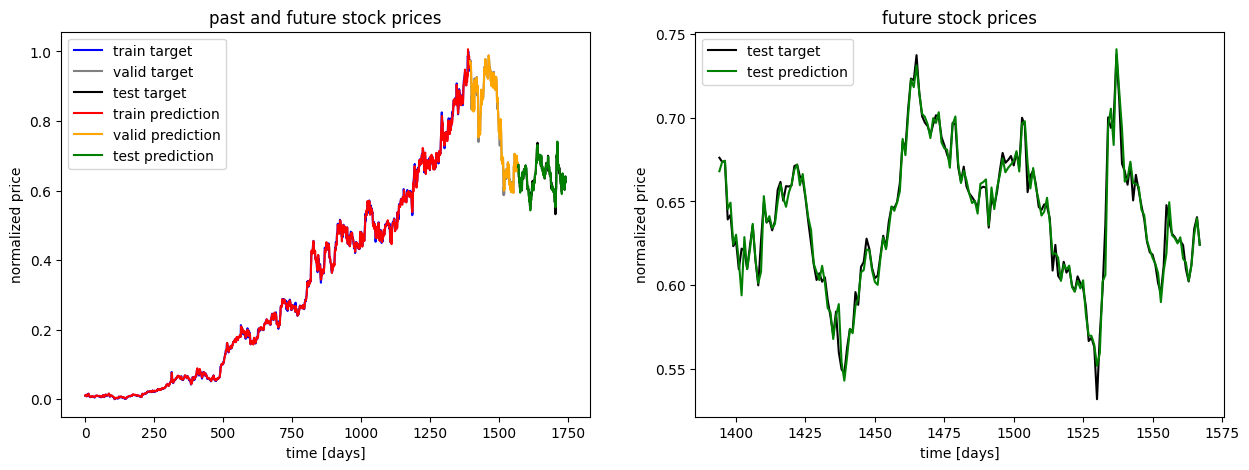

In [ ]:
ft = 0 # 0 = open, 1 = close, 2 = highest, 3 = lowest

## show predictions
plt.figure(figsize=(15, 5));
plt.subplot(1,2,1);

plt.plot(np.arange(y_train.shape[0]), y_train[:,ft], color='blue', label='train target')

plt.plot(np.arange(y_train.shape[0], y_train.shape[0]+y_valid.shape[0]), y_valid[:,ft],
         color='gray', label='valid target')

plt.plot(np.arange(y_train.shape[0]+y_valid.shape[0],
                   y_train.shape[0]+y_test.shape[0]+y_test.shape[0]),
         y_test[:,ft], color='black', label='test target')

plt.plot(np.arange(y_train_pred_regn_gru.shape[0]),y_train_pred_regn_gru[:,ft], color='red',
         label='train prediction')

plt.plot(np.arange(y_train_pred_regn_gru.shape[0], y_train_pred_regn_gru.shape[0]+y_valid_pred_regn_gru.shape[0]),
         y_valid_pred_regn_gru[:,ft], color='orange', label='valid prediction')

plt.plot(np.arange(y_train_pred_regn_gru.shape[0]+y_valid_pred_regn_gru.shape[0],
                   y_train_pred_regn_gru.shape[0]+y_valid_pred_regn_gru.shape[0]+y_test_pred_regn_gru.shape[0]),
         y_test_pred_regn_gru[:,ft], color='green', label='test prediction')

plt.title('past and future stock prices')
plt.xlabel('time [days]')
plt.ylabel('normalized price')
plt.legend(loc='best');

plt.subplot(1,2,2);

plt.plot(np.arange(y_train.shape[0], y_train.shape[0]+y_test.shape[0]),
         y_test[:,ft], color='black', label='test target')

plt.plot(np.arange(y_train_pred_regn_gru.shape[0], y_train_pred_regn_gru.shape[0]+y_test_pred_regn_gru.shape[0]),
         y_test_pred_regn_gru[:,ft], color='green', label='test prediction')

plt.title('future stock prices')
plt.xlabel('time [days]')
plt.ylabel('normalized price')
plt.legend(loc='best');

corr_price_development_train = np.sum(np.equal(np.sign(y_train[:,1]-y_train[:,0]),
            np.sign(y_train_pred_regn_gru[:,1]-y_train_pred_regn_gru[:,0])).astype(int)) / y_train.shape[0]
corr_price_development_valid = np.sum(np.equal(np.sign(y_valid[:,1]-y_valid[:,0]),
            np.sign(y_valid_pred_regn_gru[:,1]-y_valid_pred_regn_gru[:,0])).astype(int)) / y_valid.shape[0]
corr_price_development_test = np.sum(np.equal(np.sign(y_test[:,1]-y_test[:,0]),
            np.sign(y_test_pred_regn_gru[:,1]-y_test_pred_regn_gru[:,0])).astype(int)) / y_test.shape[0]

print('correct sign prediction for close - open price for train/valid/test: %.2f/%.2f/%.2f'%(
    corr_price_development_train, corr_price_development_valid, corr_price_development_test))

In [ ]:
from google.colab import files

download_save_model(model_regn_rnn, 'model_regn_rnn')
save_and_download('y_valid_pred_regn_rnn', y_valid_pred_regn_rnn)
save_and_download('y_train_pred_regn_rnn', y_train_pred_regn_rnn)
save_and_download('y_test_pred_regn_rnn', y_test_pred_regn_rnn)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
download_save_model(model_regn_lstm, 'model_regn_lstm')
save_and_download('y_valid_pred_regn_lstm', y_valid_pred_regn_lstm)
save_and_download('y_train_pred_regn_lstm', y_train_pred_regn_lstm)
save_and_download('y_test_pred_regn_lstm', y_test_pred_regn_lstm)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:

download_save_model(model_regn_gru, 'model_regn_gru')
save_and_download('y_valid_pred_regn_gru', y_valid_pred_regn_gru)
save_and_download('y_train_pred_regn_gru', y_train_pred_regn_gru)
save_and_download('y_test_pred_regn_gru', y_test_pred_regn_gru)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
len(y_valid_pred_regn_lstm)

174

In [ ]:
len(y_test_pred_regn_gru)

174

In [ ]:
len(y_train_pred_regn_gru)

1394

In [ ]:
df[df.symbol == 'REGN']

,symbol,open,close,low,high,volume
date,,,,,,
2010-01-04,REGN,24.240000,24.629999,23.969999,24.850000,510300.0
2010-01-05,REGN,24.530001,25.100000,24.510000,25.209999,628300.0
2010-01-06,REGN,25.030001,24.719999,24.530001,25.200001,599300.0
2010-01-07,REGN,24.900000,24.570000,24.250000,25.000000,433900.0
2010-01-08,REGN,24.430000,24.370001,24.150000,24.799999,445200.0
...,...,...,...,...,...,...
2016-12-23,REGN,371.670013,381.779999,371.649994,382.309998,801700.0
2016-12-27,REGN,383.910004,385.950012,382.119995,391.489990,790900.0
2016-12-28,REGN,387.880005,378.750000,376.410004,387.880005,542500.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np


def download_preds(stock):
  npy_file_path_test = "/content/drive/MyDrive/Проект/preds/" + stock + "/y_test_pred_" + stock + "_rnn.npy"
  npy_file_path_train = "/content/drive/MyDrive/Проект/preds/" + stock + "/y_train_pred_" + stock + "_rnn.npy"
  npy_file_path_valid = "/content/drive/MyDrive/Проект/preds/" + stock + "/y_valid_pred_" + stock + "_rnn.npy"

  loaded_npy_file_test = np.load(npy_file_path_test)
  loaded_npy_file_train = np.load(npy_file_path_train)
  loaded_npy_file_valid = np.load(npy_file_path_valid)

  res = np.concatenate((loaded_npy_file_train, loaded_npy_file_valid, loaded_npy_file_test))

  return res



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
download_preds('azo')

array([[-8.0231391e-04,  1.8153638e-03,  6.7757573e-03, -1.8252186e-03],
       [ 2.6328675e-04,  1.8251501e-03,  3.1822375e-03, -1.9275160e-04],
       [ 8.8758580e-04,  7.2596446e-03,  7.4923066e-03, -1.9811229e-04],
       ...,
       [ 9.6697450e-01,  9.8864049e-01,  9.6013546e-01,  9.9068719e-01],
       [ 9.7094649e-01,  9.9112582e-01,  9.6957868e-01,  9.8958254e-01],
       [ 9.6872216e-01,  9.8759276e-01,  9.6405131e-01,  9.8904306e-01]],
      dtype=float32)

In [ ]:
amzn = download_preds('amzn')
azo = download_preds('azo')
biib = download_preds('biib')
cmg = download_preds('cmg')
goog = download_preds('goog')
googl = download_preds('googl')
isrg = download_preds('isrg')
mtd = download_preds('mtd')
pcln = download_preds('pcln')
regn = download_preds('regn')

In [ ]:
stock_market = [amzn, azo, biib, cmg, goog, googl, isrg, mtd, pcln, regn ]

In [ ]:
stock_market[1][0]

array([-0.00080231,  0.00181536,  0.00677576, -0.00182522], dtype=float32)

In [ ]:
# Check the sizes of the numpy arrays
for i, stock in enumerate(stock_market):
    print(f"Size of : {stock.shape}")

Size of : (1742, 4)
Size of : (1742, 4)
Size of : (1742, 4)
Size of : (1742, 4)
Size of : (1742, 4)
Size of : (1742, 4)
Size of : (1742, 4)
Size of : (1742, 4)
Size of : (1742, 4)
Size of : (1742, 4)


Calculate


In [ ]:
# Create the stock_market array
names = ['amzn', 'azo', 'biib', 'cmg', 'goog', 'googl', 'isrg', 'mtd', 'pcln', 'regn']

num_properties = len(stock_market[0][0])  # Assuming all arrays have the same number of properties

choices = []

# Iterate through each iteration
for iteration in range(1742):
    print(f"Iteration {iteration + 1} -", end=" ")

    max_value = max(array[iteration][0] for array in stock_market)

    for i, array in enumerate(stock_market):
        if array[iteration][0] == max_value:
            choices.append(i)
            print(f"{names[i]} ({max_value})", end=" ")

    print()



Iteration 1 - isrg (0.15758657455444336) 
Iteration 2 - isrg (0.16270989179611206) 
Iteration 3 - isrg (0.17926546931266785) 
Iteration 4 - isrg (0.16746670007705688) 
Iteration 5 - isrg (0.154152050614357) 
Iteration 6 - isrg (0.15789392590522766) 
Iteration 7 - isrg (0.1541246920824051) 
Iteration 8 - isrg (0.16547246277332306) 
Iteration 9 - isrg (0.148792564868927) 
Iteration 10 - isrg (0.1639833152294159) 
Iteration 11 - isrg (0.1724129021167755) 
Iteration 12 - isrg (0.1774289309978485) 
Iteration 13 - isrg (0.19020432233810425) 
Iteration 14 - isrg (0.19163434207439423) 
Iteration 15 - isrg (0.2031107395887375) 
Iteration 16 - isrg (0.19902701675891876) 
Iteration 17 - isrg (0.1923311948776245) 
Iteration 18 - isrg (0.19084186851978302) 
Iteration 19 - isrg (0.1888296753168106) 
Iteration 20 - isrg (0.20479178428649902) 
Iteration 21 - isrg (0.22296282649040222) 
Iteration 22 - isrg (0.2342650145292282) 
Iteration 23 - isrg (0.2380213439464569) 
Iteration 24 - isrg (0.2139494121

In [ ]:
rewardsss = []
cum_rewards= []
arm_counts = np.zeros(10)

for i in range(1723):
  stock = choices[i]
  arm_counts[stock] += 1
  rewardsss.append(stonks_dynam[stock][i])
  cum_rewards.append(sum(rewardsss)/ len(rewardsss))

In [ ]:
len(choices)

1742

In [ ]:
def plot_history(rewards, cum_rewards, chosen_arms):
  name = ['AMZN', 'AZO', 'BIIB', 'CMG', 'GOOG', 'GOOGL', 'ISRG', 'MTD', 'PCLN', 'REGN']
  fig = plt.figure(figsize=[30,8])

  ax2 = fig.add_subplot(121)
  ax2.plot(cum_rewards, label="avg rewards")
  ax2.set_title("Кумулятивна Винагорода")

  ax3 = fig.add_subplot(122)
  ax3.bar(name[0:10], chosen_arms, label="chosen arms")
  ax3.set_title("Обрані Компанії")

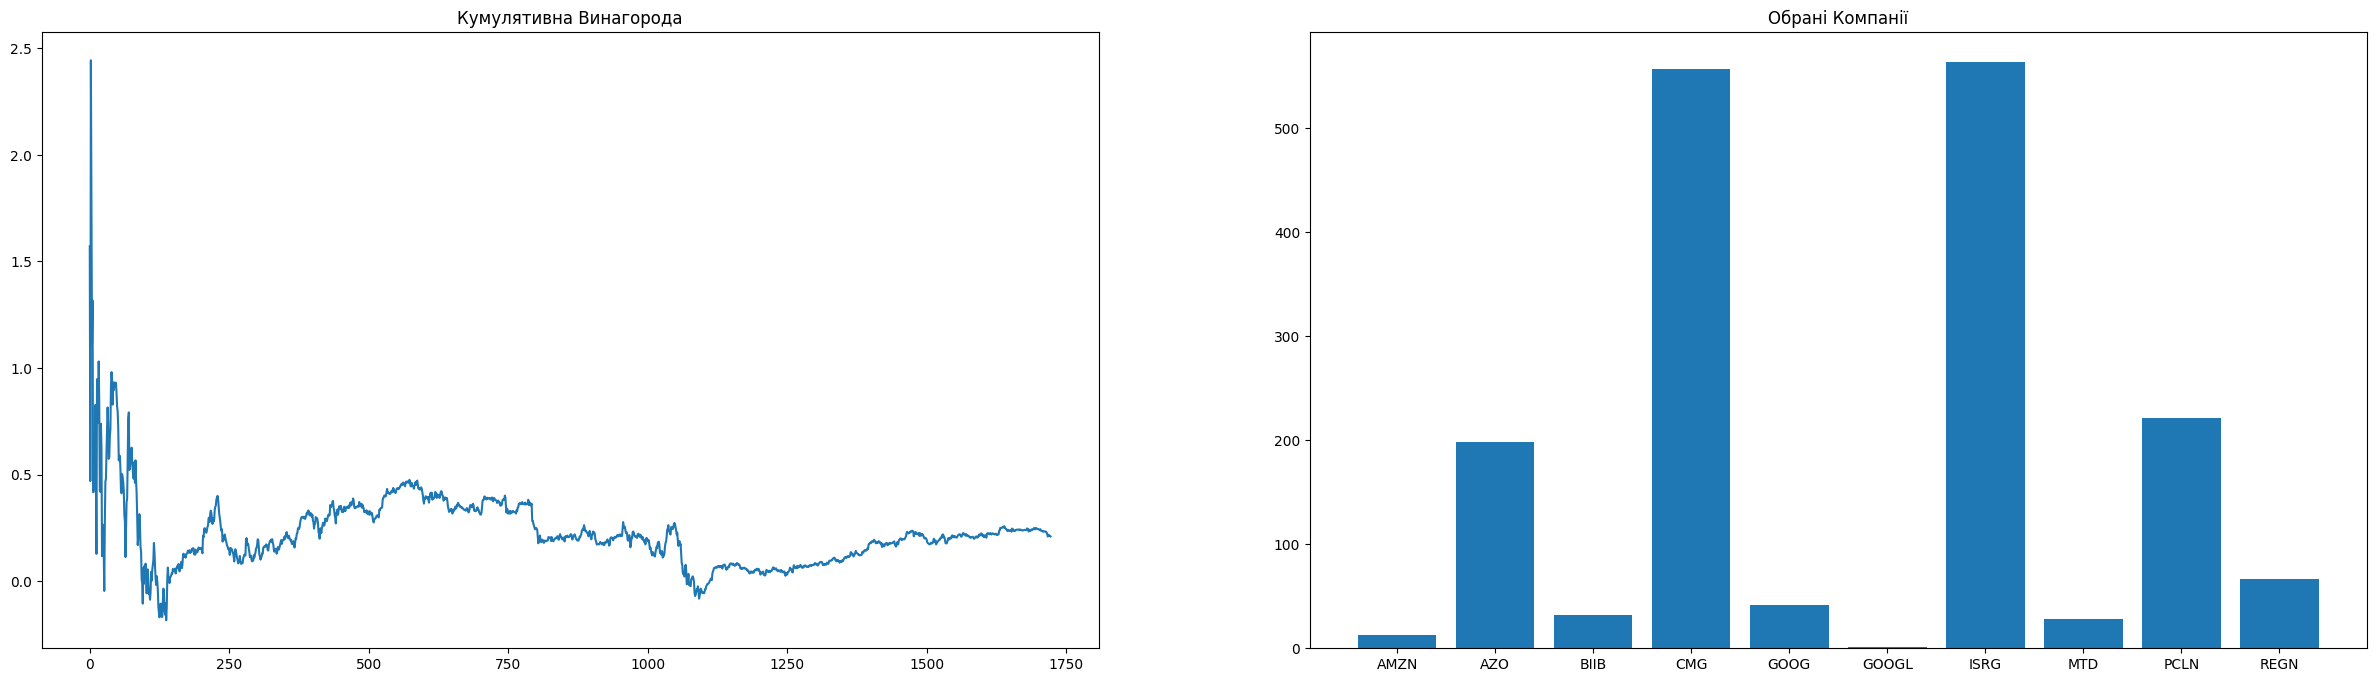

In [ ]:
plot_history(rewardsss, cum_rewards, arm_counts)

In [ ]:
sum(rewardsss)

362.1246546920017

LSTM


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np


def download_preds(stock):
  npy_file_path_test = "/content/drive/MyDrive/Проект/preds/" + stock + "/y_test_pred_" + stock + "_lstm.npy"
  npy_file_path_train = "/content/drive/MyDrive/Проект/preds/" + stock + "/y_train_pred_" + stock + "_lstm.npy"
  npy_file_path_valid = "/content/drive/MyDrive/Проект/preds/" + stock + "/y_valid_pred_" + stock + "_lstm.npy"

  loaded_npy_file_test = np.load(npy_file_path_test)
  loaded_npy_file_train = np.load(npy_file_path_train)
  loaded_npy_file_valid = np.load(npy_file_path_valid)

  res = np.concatenate((loaded_npy_file_train, loaded_npy_file_valid, loaded_npy_file_test))

  return res

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
download_preds('azo')

array([[0.00422672, 0.00590857, 0.00600333, 0.00516033],
       [0.00378135, 0.00550633, 0.00557075, 0.00479668],
       [0.00396034, 0.00567365, 0.00579258, 0.0050721 ],
       ...,
       [0.9718525 , 0.97263783, 0.9762794 , 0.97279555],
       [0.97202885, 0.97331625, 0.97677195, 0.97423124],
       [0.97186977, 0.9732466 , 0.9766586 , 0.9744629 ]], dtype=float32)

In [ ]:
amzn = download_preds('amzn')
azo = download_preds('azo')
biib = download_preds('biib')
cmg = download_preds('cmg')
goog = download_preds('goog')
googl = download_preds('googl')
isrg = download_preds('isrg')
mtd = download_preds('mtd')
pcln = download_preds('pcln')
regn = download_preds('regn')

In [ ]:
stock_market = [amzn, azo, biib, cmg, goog, googl, isrg, mtd, pcln, regn ]
# Check the sizes of the numpy arrays
for i, stock in enumerate(stock_market):
    print(f"Size of : {stock.shape}")

Size of : (1742, 4)
Size of : (1742, 4)
Size of : (1742, 4)
Size of : (1742, 4)
Size of : (1742, 4)
Size of : (1742, 4)
Size of : (1742, 4)
Size of : (1742, 4)
Size of : (1742, 4)
Size of : (1742, 4)


In [ ]:
# Create the stock_market array
names = ['amzn', 'azo', 'biib', 'cmg', 'goog', 'googl', 'isrg', 'mtd', 'pcln', 'regn']

num_properties = len(stock_market[0][0])  # Assuming all arrays have the same number of properties

choices = []

# Iterate through each iteration
for iteration in range(1742):
    print(f"Iteration {iteration + 1} -", end=" ")

    max_value = max(array[iteration][0] for array in stock_market)

    for i, array in enumerate(stock_market):
        if array[iteration][0] == max_value:
            choices.append(i)
            print(f"{names[i]} ({max_value})", end=" ")

    print()

Iteration 1 - isrg (0.1773681640625) 
Iteration 2 - isrg (0.17099083960056305) 
Iteration 3 - isrg (0.1811298131942749) 
Iteration 4 - isrg (0.18327565491199493) 
Iteration 5 - isrg (0.16854259371757507) 
Iteration 6 - isrg (0.16138824820518494) 
Iteration 7 - isrg (0.1635648012161255) 
Iteration 8 - isrg (0.16876482963562012) 
Iteration 9 - isrg (0.16241677105426788) 
Iteration 10 - isrg (0.1683744192123413) 
Iteration 11 - isrg (0.1755155622959137) 
Iteration 12 - isrg (0.1834951639175415) 
Iteration 13 - isrg (0.19552725553512573) 
Iteration 14 - isrg (0.20404556393623352) 
Iteration 15 - isrg (0.20964370667934418) 
Iteration 16 - isrg (0.21206903457641602) 
Iteration 17 - isrg (0.20656976103782654) 
Iteration 18 - isrg (0.2039126306772232) 
Iteration 19 - isrg (0.200260728597641) 
Iteration 20 - isrg (0.20917199552059174) 
Iteration 21 - isrg (0.22986900806427002) 
Iteration 22 - isrg (0.24266253411769867) 
Iteration 23 - isrg (0.24759170413017273) 
Iteration 24 - isrg (0.229899913

In [ ]:
rewardsss = []
cum_rewards= []
arm_counts = np.zeros(10)

for i in range(1723):
  stock = choices[i]
  arm_counts[stock] += 1
  rewardsss.append(stonks_dynam[stock][i])
  cum_rewards.append(sum(rewardsss)/ len(rewardsss))

In [ ]:
len(choices)

1742

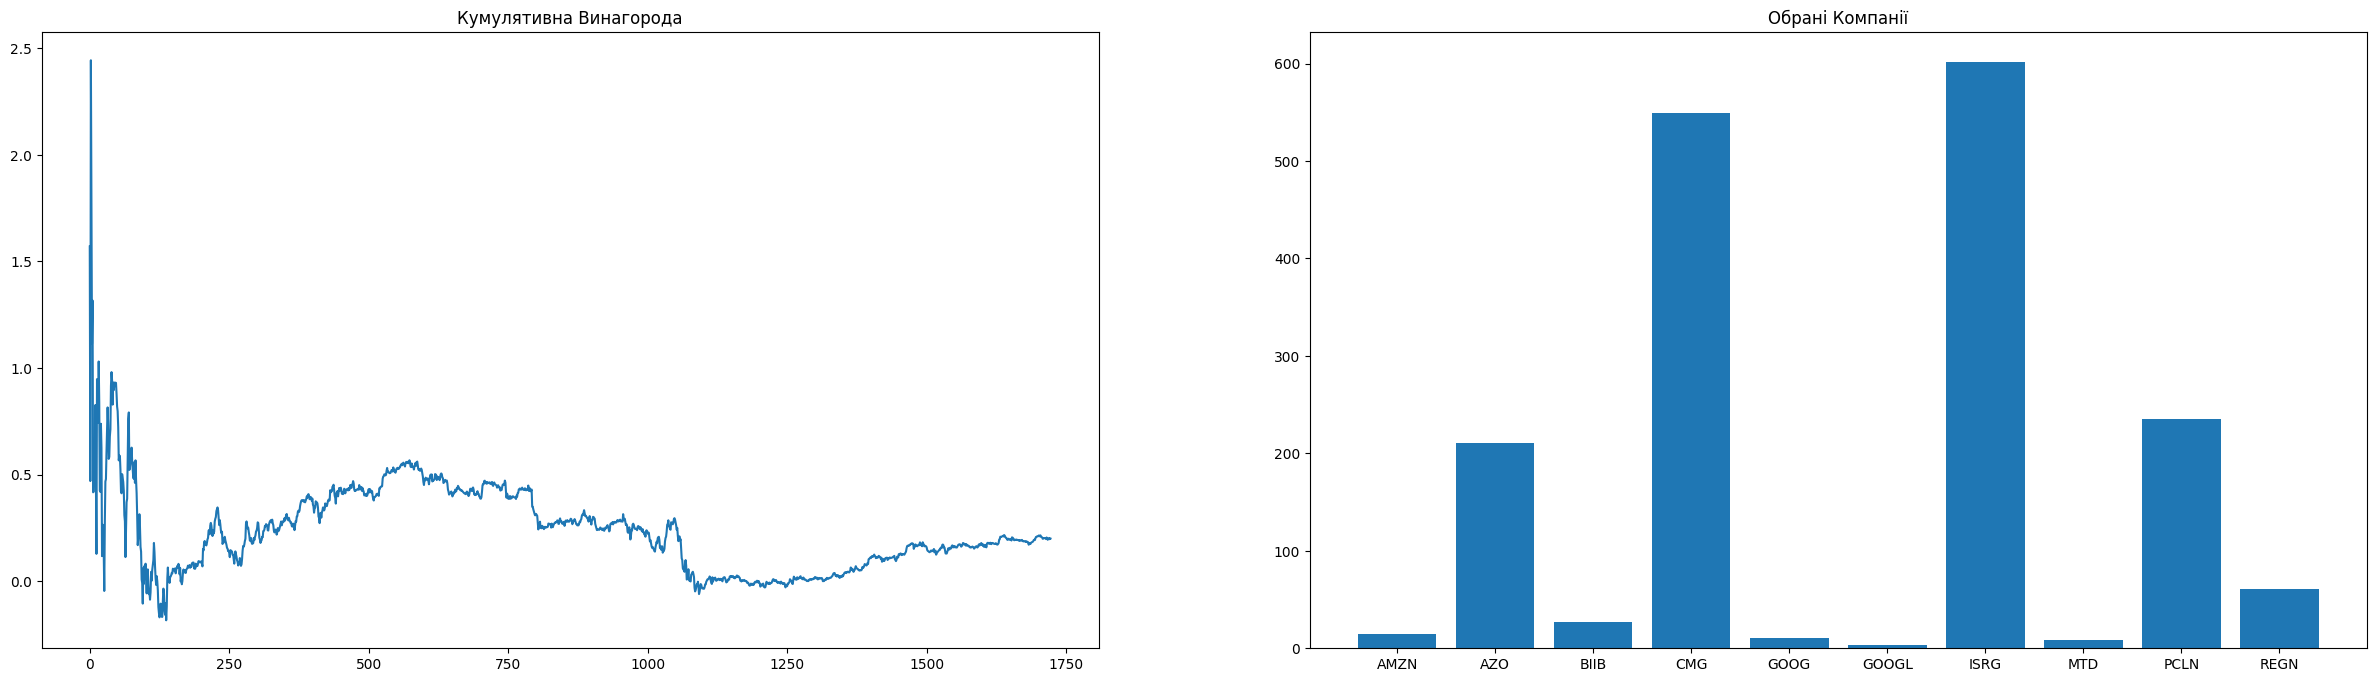

In [ ]:
plot_history(rewardsss, cum_rewards, arm_counts)

In [ ]:
sum(rewardsss)

345.3245966920024

GRU

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np


def download_preds(stock):
  npy_file_path_test = "/content/drive/MyDrive/Проект/preds/" + stock + "/y_test_pred_" + stock + "_gru.npy"
  npy_file_path_train = "/content/drive/MyDrive/Проект/preds/" + stock + "/y_train_pred_" + stock + "_gru.npy"
  npy_file_path_valid = "/content/drive/MyDrive/Проект/preds/" + stock + "/y_valid_pred_" + stock + "_gru.npy"

  loaded_npy_file_test = np.load(npy_file_path_test)
  loaded_npy_file_train = np.load(npy_file_path_train)
  loaded_npy_file_valid = np.load(npy_file_path_valid)

  res = np.concatenate((loaded_npy_file_train, loaded_npy_file_valid, loaded_npy_file_test))

  return res



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
download_preds('azo')

array([[0.00393136, 0.00411295, 0.00556516, 0.00712839],
       [0.00473838, 0.00486314, 0.00642133, 0.00794522],
       [0.00596556, 0.00605302, 0.00767448, 0.00914781],
       ...,
       [0.96919495, 0.96809566, 0.9733207 , 0.9896249 ],
       [0.980211  , 0.9786125 , 0.98480195, 1.0005714 ],
       [0.97173494, 0.97030765, 0.97602606, 0.99137926]], dtype=float32)

In [ ]:
amzn = download_preds('amzn')
azo = download_preds('azo')
biib = download_preds('biib')
cmg = download_preds('cmg')
goog = download_preds('goog')
googl = download_preds('googl')
isrg = download_preds('isrg')
mtd = download_preds('mtd')
pcln = download_preds('pcln')
regn = download_preds('regn')

In [ ]:
stock_market = [amzn, azo, biib, cmg, goog, googl, isrg, mtd, pcln, regn ]
# Check the sizes of the numpy arrays
for i, stock in enumerate(stock_market):
    print(f"Size of : {stock.shape}")

Size of : (1742, 4)
Size of : (1742, 4)
Size of : (1742, 4)
Size of : (1742, 4)
Size of : (1742, 4)
Size of : (1742, 4)
Size of : (1742, 4)
Size of : (1742, 4)
Size of : (1742, 4)
Size of : (1742, 4)


In [ ]:
# Create the stock_market array
names = ['amzn', 'azo', 'biib', 'cmg', 'goog', 'googl', 'isrg', 'mtd', 'pcln', 'regn']

num_properties = len(stock_market[0][0])  # Assuming all arrays have the same number of properties

choices = []

# Iterate through each iteration
for iteration in range(1742):
    print(f"Iteration {iteration + 1} -", end=" ")

    max_value = max(array[iteration][0] for array in stock_market)

    for i, array in enumerate(stock_market):
        if array[iteration][0] == max_value:
            choices.append(i)
            print(f"{names[i]} ({max_value})", end=" ")

    print()



Iteration 1 - isrg (0.17445571720600128) 
Iteration 2 - isrg (0.17152546346187592) 
Iteration 3 - isrg (0.18427370488643646) 
Iteration 4 - isrg (0.18099094927310944) 
Iteration 5 - isrg (0.16328133642673492) 
Iteration 6 - isrg (0.16287930309772491) 
Iteration 7 - isrg (0.16337071359157562) 
Iteration 8 - isrg (0.1681395173072815) 
Iteration 9 - isrg (0.15978150069713593) 
Iteration 10 - isrg (0.17144304513931274) 
Iteration 11 - isrg (0.17597916722297668) 
Iteration 12 - isrg (0.18133805692195892) 
Iteration 13 - isrg (0.194565549492836) 
Iteration 14 - isrg (0.20226939022541046) 
Iteration 15 - isrg (0.20827290415763855) 
Iteration 16 - isrg (0.20856548845767975) 
Iteration 17 - isrg (0.2031964808702469) 
Iteration 18 - isrg (0.20332710444927216) 
Iteration 19 - isrg (0.2008499801158905) 
Iteration 20 - isrg (0.20888881385326385) 
Iteration 21 - isrg (0.23106099665164948) 
Iteration 22 - isrg (0.2401735633611679) 
Iteration 23 - isrg (0.24333137273788452) 
Iteration 24 - isrg (0.225

In [ ]:
rewardsss = []
cum_rewards= []
arm_counts = np.zeros(10)

for i in range(1723):
  stock = choices[i]
  arm_counts[stock] += 1
  rewardsss.append(stonks_dynam[stock][i])
  cum_rewards.append(sum(rewardsss)/ len(rewardsss))

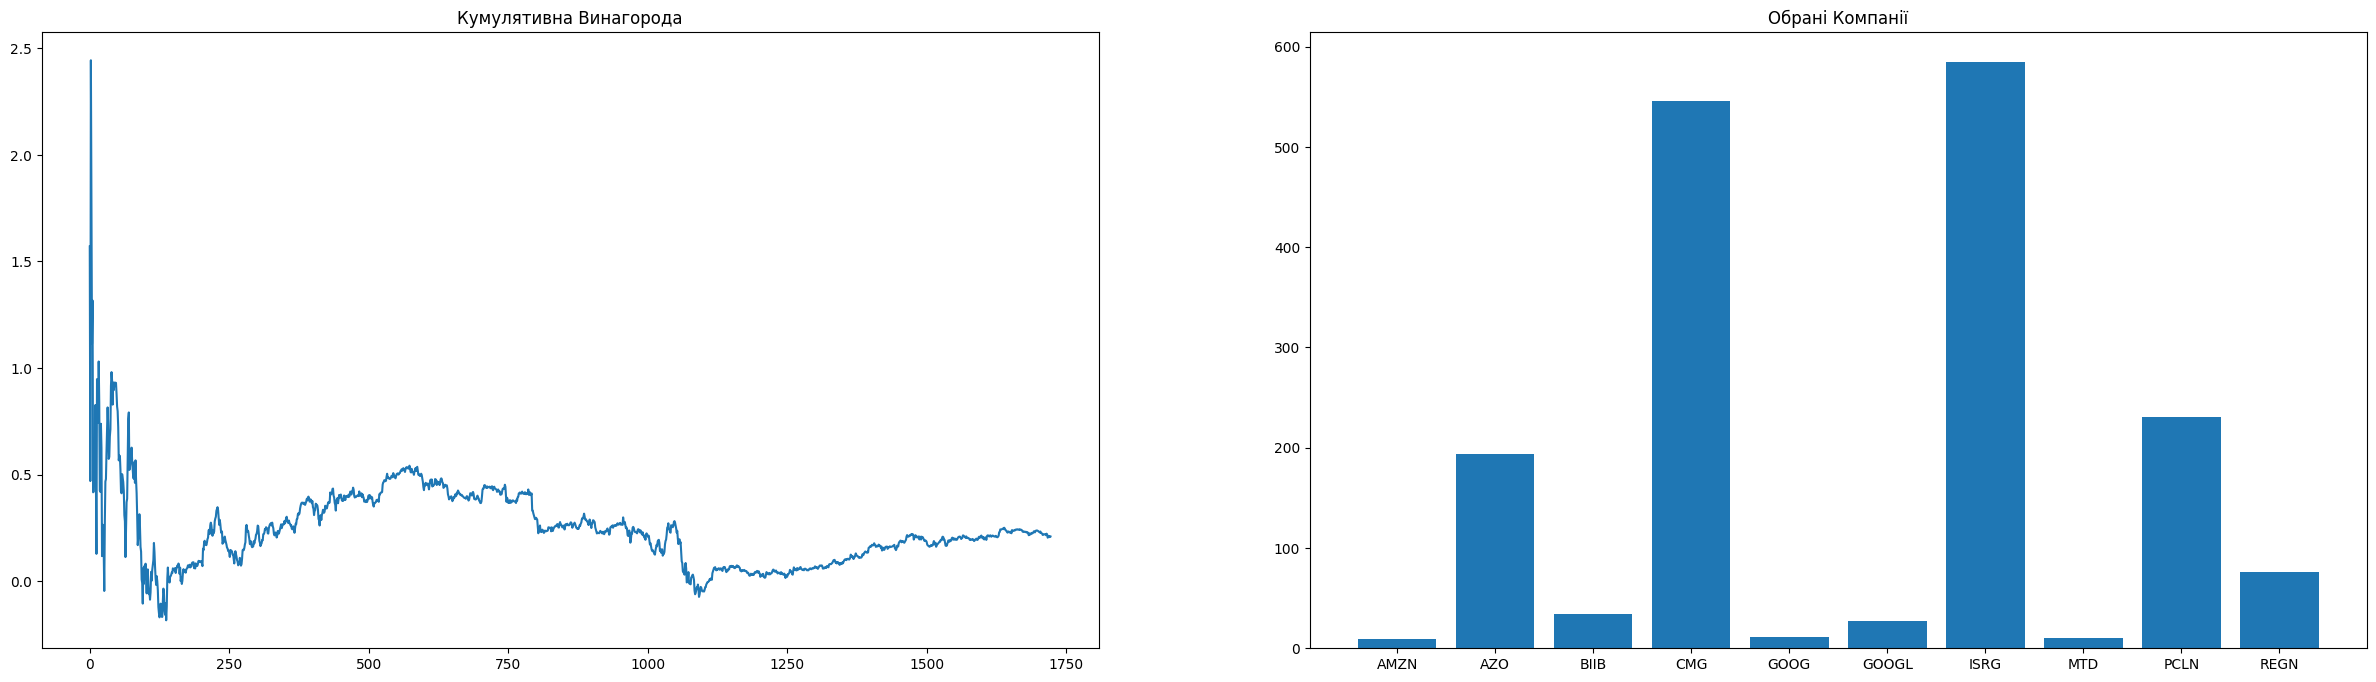

In [ ]:
plot_history(rewardsss, cum_rewards, arm_counts)

In [ ]:
sum(rewardsss)

362.1647316920022

Sandbox

In [ ]:
# Create the stock_market array
stock_market = [amzn, azo, biib]
names = ['amzn', 'azo', 'biib', 'cmg', 'goog', 'googl', 'isrg', 'mtd', 'pcln', 'regn']

num_properties = len(stock_market[0][0])  # Assuming all arrays have the same number of properties

# Iterate through each iteration
for iteration in range(num_properties-1):
    print(f"Iteration {iteration + 1} -", end=" ")

    max_value = max(array[iteration][0] for array in stock_market)

    for i, array in enumerate(stock_market):
        if array[iteration][0] == max_value:
            print(f"{names[i]} ({max_value})", end=" ")

    print()

Iteration 1 - 
Iteration 2 - 
Iteration 3 - 


In [ ]:
amzn = [
    [1, 5, 8, 3],
    [9, 7, 2, 4],
    [0, 6, 2, 8]
]

azo = [
    [3, 1, 5, 7],
    [-36, 2, 9, 8],
    [4, 0, 7, 2]
]

biib = [
    [2, 6, 1, 8],
    [3, 0, 7, 9],
    [-15, 4, 2, 1]
]

# Define the stock_market array
stock_marketr = [amzn, azo, biib]

names = ['amzn', 'azo', 'biib']

num_properties = len(stock_marketr[0][0])  # Assuming all arrays have the same number of properties

# Iterate through each iteration
for iteration in range(num_properties-1):
    print(f"Iteration {iteration + 1} -", end=" ")

    max_value = min(array[iteration][0] for array in stock_marketr)

    for i, array in enumerate(stock_marketr):
        if array[iteration][0] == max_value:
            print(f"{names[i]} ({max_value})", end=" ")

    print()

Iteration 1 - amzn (1) 
Iteration 2 - azo (-36) 
Iteration 3 - biib (-15) 


In [ ]:
path_df = "/content/drive/MyDrive/Проект/prices-split-adjusted.csv"

df = pd.read_csv(path_df, index_col = 0)
df.info()
df.head()

# number of different stocks
print('\nnumber of different stocks: ', len(list(set(df.symbol))))
print(list(set(df.symbol))[:10])



<class 'pandas.core.frame.DataFrame'>
Index: 851264 entries, 2016-01-05 to 2016-12-30
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   symbol  851264 non-null  object 
 1   open    851264 non-null  float64
 2   close   851264 non-null  float64
 3   low     851264 non-null  float64
 4   high    851264 non-null  float64
 5   volume  851264 non-null  float64
dtypes: float64(5), object(1)
memory usage: 45.5+ MB

number of different stocks:  501
['GPN', 'HPE', 'PFE', 'ADSK', 'APD', 'GD', 'EXPD', 'GRMN', 'HON', 'TSO']


In [ ]:
path_prices = "/content/drive/MyDrive/Проект/prices-split-adjusted.csv"
path_prices_adjusted = "/content/drive/MyDrive/Проект/prices-split-adjusted.csv"
path_fundamentals = "/content/drive/MyDrive/Проект/fundamentals.csv"
path_securities = "/content/drive/MyDrive/Проект/securities.csv"

df_prices = pd.read_csv(path_prices)
df_prices_adjusted = pd.read_csv(path_prices_adjusted)
df_fundamentals = pd.read_csv(path_fundamentals)
df_securities = pd.read_csv(path_securities)
df_prices["change"] = df_prices["close"] - df_prices['open']


<ipython-input-7-aa38e1adbc17>:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dates = df_masked2[(df_prices["symbol"] == u)]["date"]
<ipython-input-7-aa38e1adbc17>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  values = df_masked2[(df_prices["symbol"] == u)]["close"]


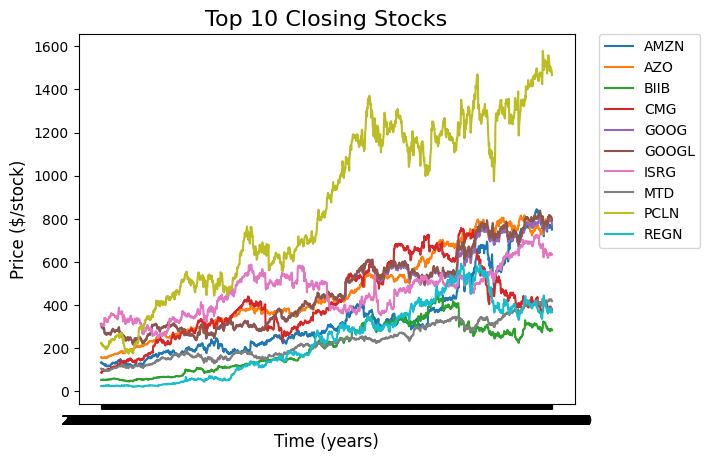

In [ ]:
symbols = df_prices["symbol"].unique().tolist()
maxPerSymbol={}
for u in symbols:
    values = df_prices[(df_prices["symbol"] == u)]["close"].tolist()
    maxPerSymbol[u] = max(values)

top10Closers = ['AMZN', 'AZO', 'BIIB', 'CMG', 'GOOG', 'GOOGL', 'ISRG', 'MTD', 'PCLN', 'REGN']


top_10_mask = [i in top10Closers for i in df_prices["symbol"].tolist()]
df_masked2 = df_prices[top_10_mask]
df_masked2.head()

#Visualize top10 most recent closers
symbols = df_masked2["symbol"].unique().tolist()
for u in symbols[:10]:
    dates = df_masked2[(df_prices["symbol"] == u)]["date"]
    values = df_masked2[(df_prices["symbol"] == u)]["close"]
    plt.plot(dates.tolist(), values.tolist())
#plt.legend(symbols, loc='upper left')
plt.legend(symbols, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title(r'Top 10 Closing Stocks', fontsize=16)
plt.xlabel('Time (years)', fontsize=12)
plt.ylabel('Price ($/stock)', fontsize=12)
plt.show()

In [ ]:
top10Closers = ['AMZN', 'AZO', 'BIIB', 'CMG', 'GOOG', 'GOOGL', 'ISRG', 'MTD', 'PCLN', 'REGN']
top10Closers

['AMZN', 'AZO', 'BIIB', 'CMG', 'GOOG', 'GOOGL', 'ISRG', 'MTD', 'PCLN', 'REGN']

In [ ]:
df_masked2

,date,symbol,open,close,low,high,volume,change
284,2010-01-04,AMZN,136.250000,133.899994,133.139999,136.610001,7599900.0,-2.350006
300,2010-01-04,AZO,158.990005,158.029999,157.710007,159.389999,408300.0,-0.960006
311,2010-01-04,BIIB,53.970001,53.639999,53.599998,53.970001,2469700.0,-0.330002
342,2010-01-04,CMG,89.599998,87.839996,87.180000,89.599998,313900.0,-1.760002
439,2010-01-04,GOOG,312.304948,312.205308,310.955001,313.580158,3927000.0,-0.099640
...,...,...,...,...,...,...,...,...
850964,2016-12-30,GOOGL,803.210022,792.450012,789.619995,803.289978,1728300.0,-10.760010
851007,2016-12-30,ISRG,638.320007,634.169983,632.250000,638.390015,267300.0,-4.150024
851079,2016-12-30,MTD,421.980011,418.559998,417.029999,423.589996,124200.0,-3.420013
851115,2016-12-30,PCLN,1483.489990,1466.060059,1462.339966,1483.489990,405100.0,-17.429931


In [ ]:
AMZN = df_masked2[(df_masked2["symbol"] == "AMZN")]["change"]
AZO = df_masked2[(df_masked2["symbol"] == "AZO")]["change"]
BIIB = df_masked2[(df_masked2["symbol"] == "BIIB")]["change"]
CMG = df_masked2[(df_masked2["symbol"] == "CMG")]["change"]
GOOG = df_masked2[(df_masked2["symbol"] == "GOOG")]["change"]
GOOGL = df_masked2[(df_masked2["symbol"] == "GOOGL")]["change"]
ISRG = df_masked2[(df_masked2["symbol"] == "ISRG")]["change"]
MTD = df_masked2[(df_masked2["symbol"] == "MTD")]["change"]
PCLN = df_masked2[(df_masked2["symbol"] == "PCLN")]["change"]
REGN = df_masked2[(df_masked2["symbol"] == "REGN")]["change"]

In [ ]:
def calculate_sum(df):
  print(df.sum())

calculate_sum(AMZN)
calculate_sum(AZO)
calculate_sum(BIIB)
calculate_sum(CMG)
calculate_sum(GOOG)
calculate_sum(GOOGL)
calculate_sum(ISRG)
calculate_sum(MTD)
calculate_sum(PCLN)
calculate_sum(REGN)


41.220902000000976
286.4294730000022
-141.38000700000043
248.7197810000019
-333.2319060869976
-365.8293174779993
329.3397310000032
284.91984799999864
-35.22986699999589
-74.95987899999965


In [ ]:
AMZN_df = df_masked2[(df_masked2["symbol"] == "AMZN")]
AZO_df = df_masked2[(df_masked2["symbol"] == "AZO")]
BIIB_df = df_masked2[(df_masked2["symbol"] == "BIIB")]
CMG_df = df_masked2[(df_masked2["symbol"] == "CMG")]
GOOG_df = df_masked2[(df_masked2["symbol"] == "GOOG")]
GOOGL_df = df_masked2[(df_masked2["symbol"] == "GOOGL")]
ISRG_df = df_masked2[(df_masked2["symbol"] == "ISRG")]
MTD_df = df_masked2[(df_masked2["symbol"] == "MTD")]
PCLN_df = df_masked2[(df_masked2["symbol"] == "PCLN")]
REGN_df = df_masked2[(df_masked2["symbol"] == "REGN")]

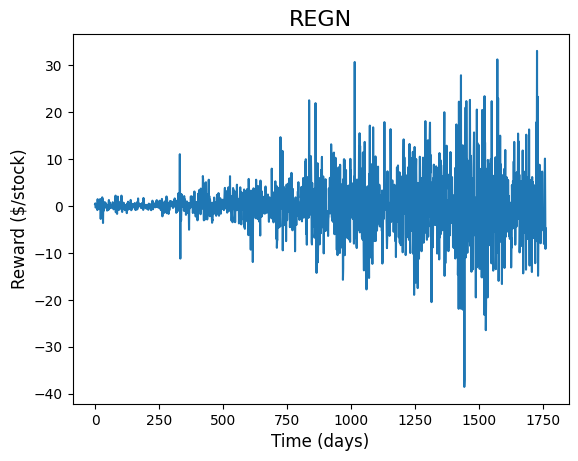

In [ ]:
#Visualize top10 most recent closers
dates =REGN_df["date"]
values = REGN_df["change"]
plt.plot(values.tolist())
#plt.legend(symbols, loc='upper left')
plt.title('REGN', fontsize=16)
plt.xlabel('Time (days)', fontsize=12)
plt.ylabel('Reward ($/stock)', fontsize=12)
plt.show()

In [ ]:
def info_about_df(df):
  print('change max', df['change'].max())
  print('change min', df['change'].min())
  print('change mean', df['change'].mean())
  print('open max', df['open'].max())
  print('open min', df['open'].min())
  print('open mean', df['open'].mean())
  print('closed max', df['close'].max())
  print('closed min', df['close'].min())
  print('closed mean', df['close'].mean())

In [ ]:
print('AMZN_df')
info_about_df(AMZN_df)
print('AZO_df')
info_about_df(AZO_df)
print('BIIB_df')
info_about_df(BIIB_df)
print('CMG_df')
info_about_df(CMG_df)
print('GOOG_df')
info_about_df(GOOG_df)
print('GOOGL_df')
info_about_df(GOOGL_df)
print('ISRG_df')
info_about_df(ISRG_df)
print('MTD_df')
info_about_df(MTD_df)
print('PCLN_df')
info_about_df(PCLN_df)
print('REGN_df')
info_about_df(REGN_df)

AMZN_df
change max 26.979980999999952
change min -49.57000700000003
change mean 0.023394382519864344
open max 845.789978
open min 105.93
open mean 337.8756639023837
closed max 844.359985
closed min 108.610001
closed mean 337.8990582849035
AZO_df
change max 27.720031999999946
change min -34.0
change mean 0.16255929228149954
open max 816.119995
open min 154.139999
open mean 468.84518747559594
closed max 815.97998
closed min 154.380005
closed mean 469.00774676787745
BIIB_df
change max 27.229980000000012
change min -36.470001000000025
change mean -0.08023836946651557
open max 475.920013
open min 46.43
open mean 207.43162878320092
closed max 475.980011
closed min 46.220001
closed mean 207.35139041373435
CMG_df
change max 34.919983
change min -75.80999799999995
change mean 0.14115765096481378
open max 758.48999
open min 87.339996
open mean 411.1128321379115
closed max 757.77002
closed min 86.43
closed mean 411.25398978887625
GOOG_df
change max 23.929992999999968
change min -43.26995899999997

In [ ]:
AMZN_df

,date,symbol,open,close,low,high,volume,change
284,2010-01-04,AMZN,136.250000,133.899994,133.139999,136.610001,7599900.0,-2.350006
751,2010-01-05,AMZN,133.429993,134.690002,131.809998,135.479996,8851900.0,1.260009
1219,2010-01-06,AMZN,134.600006,132.250000,131.649994,134.729996,7178800.0,-2.350006
1687,2010-01-07,AMZN,132.009995,130.000000,128.800003,132.320007,11030200.0,-2.009995
2155,2010-01-08,AMZN,130.559998,133.520004,129.029999,133.679993,9830500.0,2.960006
...,...,...,...,...,...,...,...,...
848799,2016-12-23,AMZN,764.549988,760.590027,757.989990,766.500000,1976900.0,-3.959961
849299,2016-12-27,AMZN,763.400024,771.400024,761.200012,774.650024,2627400.0,8.000000
849799,2016-12-28,AMZN,776.250000,772.130005,770.500000,780.000000,3279100.0,-4.119995
850299,2016-12-29,AMZN,772.400024,765.150024,760.849976,773.400024,3153500.0,-7.250000


In [ ]:
AMZN_list = AMZN.to_numpy()
AZO_list = AZO.to_numpy()
BIIB_list = BIIB.to_numpy()
CMG_list = CMG.to_numpy()
GOOG_list = GOOG.to_numpy()
GOOGL_list = GOOGL.to_numpy()
ISRG_list = ISRG.to_numpy()
MTD_list = MTD.to_numpy()
PCLN_list = PCLN.to_numpy()
REGN_list = REGN.to_numpy()

In [ ]:
stonks_dynam = [AMZN_list, AZO_list, BIIB_list, CMG_list, GOOG_list, GOOGL_list, ISRG_list, MTD_list, PCLN_list, REGN_list]

In [ ]:
len(AMZN_list)

1762

In [ ]:
stonks_dynam

[array([ -2.350006,   1.260009,  -2.350006, ...,  -4.119995,  -7.25    ,
        -16.599976]),
 array([ -0.960006,  -1.939987,  -1.209992, ...,  -8.329956,   2.859985,
        -10.559998]),
 array([-0.330002, -1.34    ,  0.330002, ..., -2.73999 , -1.929992,
        -4.210022]),
 array([-1.760002,  1.5     , -1.269996, ..., -4.230011, -8.960022,
         0.800018]),
 array([ -0.09964002,  -1.58905284,  -8.76716601, ...,  -8.650024  ,
         -0.540039  , -10.929993  ]),
 array([ -0.1000976 ,  -1.59658859,  -8.80880781, ...,  -8.76001   ,
          0.549988  , -10.76001   ]),
 array([ 1.569977, -0.630005,  6.389984, ..., -4.25    ,  1.979981,
        -4.150024]),
 array([ 0.159996, -1.730003, -0.440003, ..., -8.650024,  0.399994,
        -3.420013]),
 array([  1.64    ,   2.459992,  -6.039993, ..., -14.270019,   2.950073,
        -17.429931]),
 array([ 0.389999,  0.569999, -0.310002, ..., -9.130005, -4.690003,
        -8.209992])]